# Test 38: The $\chi^2$-test for compatibility of K counts

## Objective

- I have some set of $K$ counts

- Are all the counts the same as each other?

## Assumptions

- The counts must be obtained under comparable conditions.

## Method

- I run some experiment and obtain $K$ different counts from $K$ different data generating processes

- For each process, the count was obtained in time $t_1, t_2, ... t_k$

- If $t_1 = t_2 = ... t_k$, then the test statistic is
$$\begin{aligned}
    \chi^2 &= \sum_{i=1}^{K} \frac{(N_i - \bar{N})^2}{\bar{N}} \\ \\

    \bar{N} &= \sum_{i=1}^{K} \frac{N_i}{K}

\end{aligned}$$

- If the counts are obtained over different time periods, then the test statistic is
$$\begin{aligned}
    \chi^2 &= \sum_{i=1}^{K} \frac{(N_i - t_i \bar{R})^2}{t_i \bar{R}} \\ \\

    \bar{R} &= \sum_{i=1}^{K} \frac{N_i}{t_i}

\end{aligned}$$



## Proof

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
K = 6
N = 6_000

def get_test_statistic():
    sample_roll = dict(Counter(np.random.randint(1, K+1, N)))
    nbar = np.sum([sample_roll.get(key)/K for key in sample_roll.keys()])
    test_statistic = np.sum([
        ((sample_roll.get(key) - nbar)**2)/nbar for key in sample_roll.keys() 
    ])
    return test_statistic

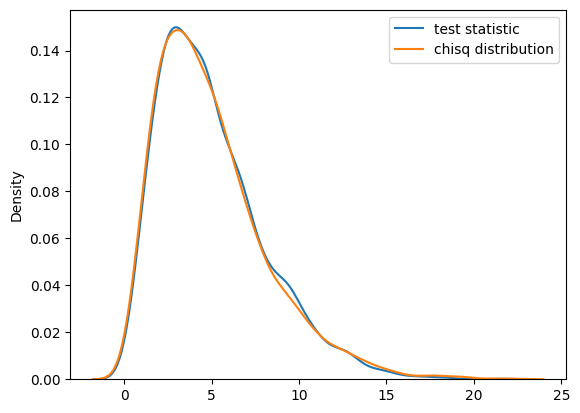

In [4]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(df=K-1, size=3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()